# Conduction of Heat through the Soil

How heat changes the temperature of the soil depends on a number of things, including the amount of heat, the type of soil, the presence of water, etc. In this computer lab, we will develop an idea of what's going on, based on the following text: https://open.library.okstate.edu/rainorshine/chapter/13-1-heat-transfer-in-soil/

The Heat balance at the surface consists of 4 different components:
* Incoming radiation from the atmosphere (both solar and infrared)
* Convection of Heat (thermals) back into the atmosphere
* Convection of Moisture (leading to clouds) back into the atmosphere
* A ground flux of heat deeper into the Soil.

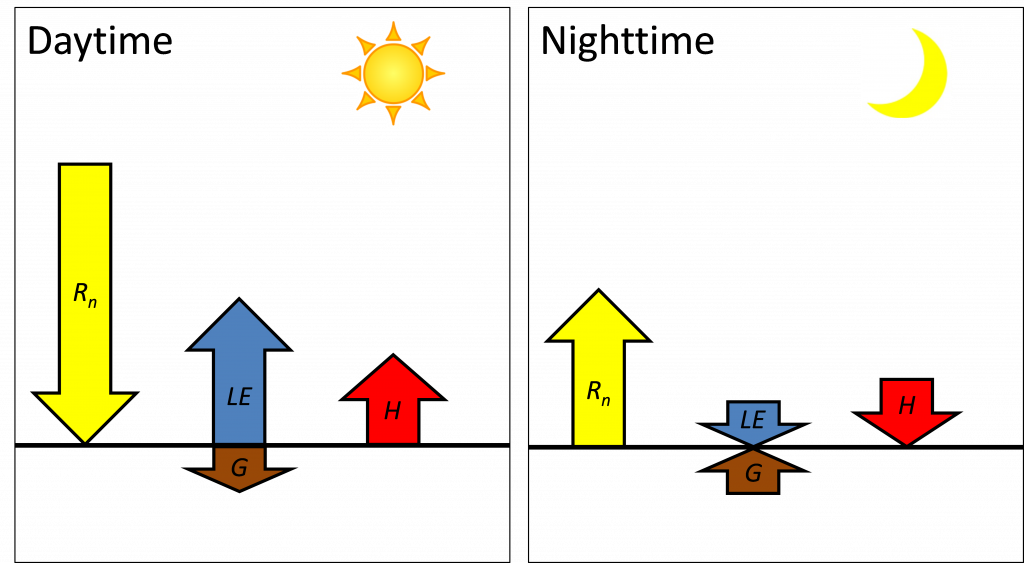

We're first going to focus on the Soil Heat flux, assuming that there is no convection at all.


## Soil conduction

We've seen in class that the conduction through a layer of soil of thickness $\Delta z$ goes as follows:

$j = \frac{Q}{A \Delta t} = \frac{k}{\Delta z} (T_{above} - T_{below})$

or, to write it as a _differential equation_:

$j = -k \frac{dT}{dz}$.              (1)

These two equations mean exactly the same, but the second one is more useful if we have an object that is not as easy to chop up in different layer, such as the soil.

Similarly, we know that the heat flux changes the temperature of the soil:

$Q = c m \Delta T$, 
which can be converted into a differential equation again:

$\frac{dT}{dt} = \frac{1}{c \rho} \frac{dj}{dz}$.

Or, if we do this in little steps $\Delta t$:

$T_{new}(z) - T_{old}(z) = \frac{1}{c \rho} \frac {dj}{dz} \Delta t$        (2)

We can now solve these equations, using two functions, one of which calculates the heat flux $j$, and one which calculates how the temperature changes.

In [1]:
#First, load the modules to do the calculations. Just press shift+enter
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Now create the functions. You can press shift+enter, but be sure to compare this block with the equations above

#First, calculate the flux (equation 1)
def calc_soil_flux(z, T, k):
    j = k * np.gradient(T,z, edge_order=2) #The function "gradient" from the NumPy package calculates the slope of temperature with soil depth z
    return j # "Return" gives the value of j back to the main program


#Now calculate the temperature from the flux (equation 2)
def calc_soil_temp(z, Told, j, c, rho, dt):
    Tnew = Told + 1/( c * rho) * np.gradient(j, z, edge_order=2) * dt
    return Tnew


Now we're going to a) Set up the properties of the soil, the heat coming from above, and how long/deep we want to measure; and b) for each time step we will call the functions above to calculate how the temperature of the soil changes over time
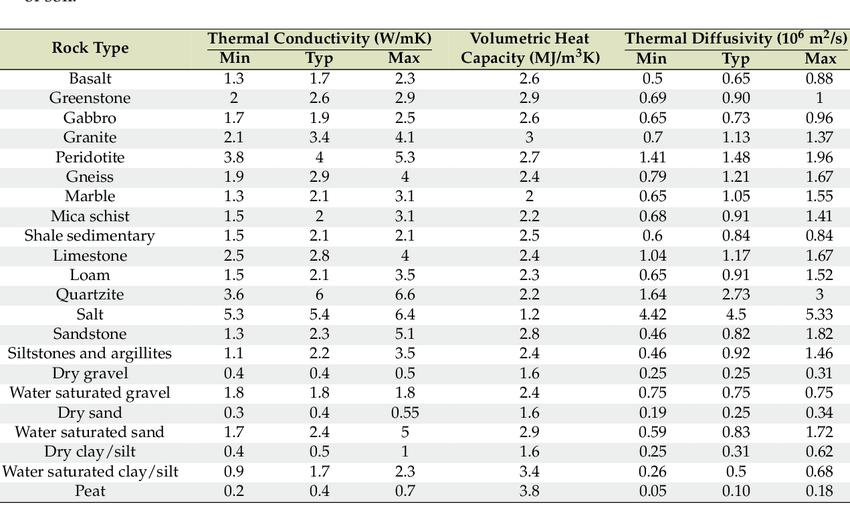

In our first attempt, we're setting up our simulation with $R = 300 W/m^2$ going all down into the soil. This is the average amount of sunlight, averaged over day, night and latitude. In the computing cell below, we will calculate the temperature change if we do that over the course of 10 days.

Text(0, 0.5, 'Temperature (C)')

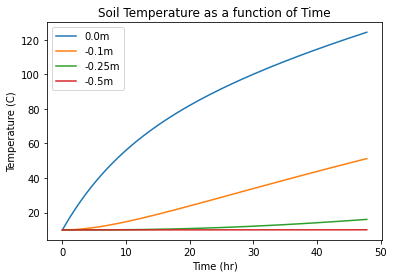

In [3]:
z         = np.arange(0, -1, -0.05)        #We're looking at 1m of depth, in steps of 5cm
time      = np.arange(0, 2*24*3600.,600)   #2 days, in time steps of 10 minutes

jtop      = 300 * np.ones(time.size) #We're heating up the soil with 300W/m2
temp_init = 10                      #We start with a temperature of 10C everywhere in the layer. Since everything we're doing is a difference, we're allowed to use Celcius, not Kelvin
k         = 0.3
rho       = 2.65e3                   #The table above has a value in g/cm-3, so we have to multiply by 1000 to end up with SI units
c         = 1.9e3                    #Again, conversion g->kg

#To do the calculations, we create an array with temperatures as a function of depth and time.  You shouldn't need to change anything here
temp      = temp_init * np.ones((z.size, time.size))

#Now we step through the time series to calculate each temperature, using a "for loop".
for t in range(1, time.size):
    dt        = time[t] - time[t-1]
    j         = calc_soil_flux(z, temp[:,t-1], k)
    j[0]      = jtop[t]                             #The heat flux at the surface is a fixed value that we have set above.
    temp[:,t] = calc_soil_temp(z, temp[:, t-1], j, c, rho, dt)

plt.plot(time/3600,temp[0,:], label = str(z[0]) + 'm')
plt.plot(time/3600,temp[2,:], label = str(z[2]) + 'm')
plt.plot(time/3600,temp[5,:], label = str(z[5]) + 'm')
plt.plot(time/3600,temp[10,:], label = str(z[10]) + 'm')
plt.legend()
plt.title('Soil Temperature as a function of Time')
plt.xlabel('Time (hr)')
plt.ylabel('Temperature (C)')

## *QUESTION*: What do you observe in the graph above? Write it down in this box.


It goes up.

In reality, the Ground Heat Flux will depend on the albedo and the type of canopy.

a) the *albedo*, or reflectivity ranges from 0 (absorbing all sunlight) to 1 (reflecting it all). More reflection means less available heat  going into the ground. The albedo for dark asphalt is about 0.1; for grass it is about 0.25  

b) The denser the canopy, the more heat will be converted into evaporation, which means less will be available to heat up the ground.
According to this paper: https://agupubs.onlinelibrary.wiley.com/doi/10.1002/2016JG003591, the Ground Heat Flux depends on the type of canopy:
$G = 0.25 R$ for bare soil
$G = 0.20 R$ for short canopy (grass)
$G = 0.05 R$ for tall canopy (trees)
More complex models are also discussed, but we'll ignore them here.

### Copy/paste the code cell from above three times, modify jtop accordingly, and compare the outcome. 

In [ ]:
z         = np.arange(0, -1, -0.05)        #We're looking at 1m of depth, in steps of 5cm
time      = np.arange(0, 2*24*3600.,600)   #2 days, in time steps of 10 minutes

jtop      = 0.25*300 * np.ones(time.size) #We're heating up the soil with 300W/m2
temp_init = 10                      #We start with a temperature of 10C everywhere in the layer. Since everything we're doing is a difference, we're allowed to use Celcius, not Kelvin
k         = 0.3
rho       = 2.65e3                   #The table above has a value in g/cm-3, so we have to multiply by 1000 to end up with SI units
c         = 1.9e3                    #Again, conversion g->kg

#To do the calculations, we create an array with temperatures as a function of depth and time.  You shouldn't need to change anything here
temp      = temp_init * np.ones((z.size, time.size))

#Now we step through the time series to calculate each temperature, using a "for loop".
for t in range(1, time.size):
    dt        = time[t] - time[t-1]
    j         = calc_soil_flux(z, temp[:,t-1], k)
    j[0]      = jtop[t]                             #The heat flux at the surface is a fixed value that we have set above.
    temp[:,t] = calc_soil_temp(z, temp[:, t-1], j, c, rho, dt)

plt.plot(time/3600,temp[0,:], label = str(z[0]) + 'm')
plt.plot(time/3600,temp[2,:], label = str(z[2]) + 'm')
plt.plot(time/3600,temp[5,:], label = str(z[5]) + 'm')
plt.plot(time/3600,temp[10,:], label = str(z[10]) + 'm')
plt.legend()
plt.title('Soil Temperature as a function of Time')
plt.xlabel('Time (hr)')
plt.ylabel('Temperature (C)')

### QUESTION: How does this reflect on the Urban Heat Island Effect that we discussed in class?

## The Diurnal and Annual Cycle of Heat
We will now drive the model such that we set the temperature at the top, fluctuating between day and night. We'll do that by setting the mean temperature over the day ($15C$), an amplitude ($5C$), and a period ($24hrs$), as well as all the settings from above. In the loop all the way at the bottom, we now fix the *temperature* instead of the *flux*. Compare the code with the above, and run it. 

Text(0, 0.5, 'Temperature (C)')

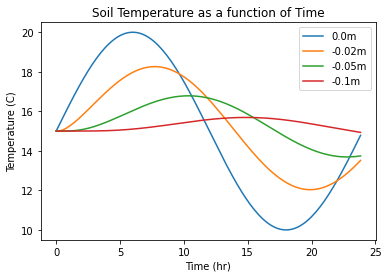

In [4]:
period    = 1 * 24 * 3600             # 1 Day cycle
amplitude = 5                         #5C amplitude of the daily cycle
z         = np.arange(0, -1, -0.01)   #We're looking at 1m of depth, in steps of 5cm
time      = np.arange(0, period,600)  #1 days, in time steps of 10 minutes

temp_init = 15                        #We start with a temperature of 10C everywhere in the layer. Since everything we're doing is a difference, we're allowed to use Celcius, not Kelvin
k         = 0.3
rho       = 2.65e3                    #The table above has a value in g/cm-3, so we have to multiply by 1000 to end up with SI units
c         = 1.9e3                     #Again, conversion g->kg

#To do the calculations, we create an array with temperatures as a function of depth and time.  You shouldn't need to change anything here
temp      = temp_init * np.ones((z.size, time.size))
temp_top  = temp_init + amplitude*np.sin((2*np.pi / period) * time)

#Now we step through the time series to calculate each temperature, using a "for loop".
for t in range(1, time.size):
    dt        = time[t] - time[t-1]
    j         = calc_soil_flux(z, temp[:,t-1], k)
    temp[:,t] = calc_soil_temp(z, temp[:, t-1], j, c, rho, dt)
    temp[0,t] = temp_top[t]
    
#Make a graph; feel free to choose your own heights
plt.plot(time/3600,temp[0,:], label = str(z[0]) + 'm')
plt.plot(time/3600,temp[2,:], label = str(z[2]) + 'm')
plt.plot(time/3600,temp[5,:], label = str(z[5]) + 'm')
plt.plot(time/3600,temp[10,:], label = str(z[10]) + 'm')
plt.legend()

plt.title('Soil Temperature as a function of Time')
plt.xlabel('Time (hr)')
plt.ylabel('Temperature (C)')

### QUESTION: Describe and explain what you see in the graphs. If the surface hits its maximum temperature at noon, when will the soil at 10cm/4in into the ground be the warmest?

Now copy/paste the code from above, and change the time values and amplitude to mimick the seasonal cycle of 365 days. Assuming a yearly average temperature in Cleveland of $10C$ and an amplitude of $7C$, at what depth will the soil always stay above freezing?  